In [48]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import scipy.stats
import os
import json

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [49]:
dist_n = np.random.randn(1000)

#test ad and ks. those are easy
print "normal on normal", scipy.stats.kstest(dist_n,'norm')
print "normal on normal", scipy.stats.anderson(dist_n, dist='norm')
print "" 

dist_b = np.random.binomial(1, 0.5, 1000)

print "poisson on normal", scipy.stats.kstest(dist_b,'norm')
print "poisson on normal", scipy.stats.anderson(dist_b, dist='norm')

threshold = scipy.stats.anderson(dist_n, dist='norm')[1][scipy.stats.anderson(dist_n, dist='norm')[2]==[1.0]]
print threshold


##what is this threshold I am saving??

normal on normal (0.036925317931322754, 0.12762538716557725)
normal on normal (0.46436439344677183, array([ 0.574,  0.653,  0.784,  0.914,  1.088]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

poisson on normal (0.5, 0.0)
poisson on normal (179.55380826126452, array([ 0.574,  0.653,  0.784,  0.914,  1.088]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
[ 1.088]


In [89]:
#to store the data i am generating an empty array of the size of the values of n i want to test. i do that with np.zeros which takes the length of the array as argument, and the data type as optional argument, but default is float, which is fine by me, so i do not need any argument other then the lenght 
narray = range(1,50,1)
ks_b = np.zeros(len(narray))
ad_b = np.zeros(len(narray))
kl_b = np.zeros(len(narray))
chi2_b = np.zeros(len(narray))


def mynorm (x, mu, var):
    return scipy.stats.norm.cdf(x, loc=mu, scale=var)

#then i put the tests in a for loop so that i can generate a distribution for given parameters once, 
#and run all tests against it
#now the valus that i want to plot depends on how i intend to describe the plot, and viceversa. 

#here is one way to plot it, knowing the values i get for the tests when 
#i throw in a poisson distribution with low l and compare it with a gaussian and 
#assuming that that is a vary bad match
p=0.5
for i,n in enumerate(narray):
    p=0.1 #parameter for the binomial, my arbitrary choice
    #generate the distribution
    dist = np.random.binomial(n, p, 1000)
    #run the tests. 
 
    ks_b[i] = scipy.stats.kstest(dist, mynorm, args=(n*p, n*p*(1.0-p)))[0]
    ad_b[i] = scipy.stats.anderson(dist, dist='norm')[0]
    
    
    # for KL and Pearson's chisq I have to simulate the normal distribution as well
    mybins=np.linspace(min(dist),max(dist), 10) 
    bincenters = mybins[:-1]+0.5*(mybins[1]-mybins[0])

    #when i was coding this up something was wrong. i put some plots in to figure out what... just so you know.
    #if i%10 == 0: 
    #    print n
    #    pl.figure()
    #    pl.hist(dist, bins=mybins)
    #    pl.plot(bincenters, 1000*scipy.stats.norm.pdf(bincenters, loc=n*p, scale=n*p*(1-p)))
    kl_b [i] =  scipy.stats.entropy(np.histogram(dist, bins=mybins)[0], scipy.stats.norm.pdf(bincenters, loc=n*p, scale=n*p*(1.0-p)))

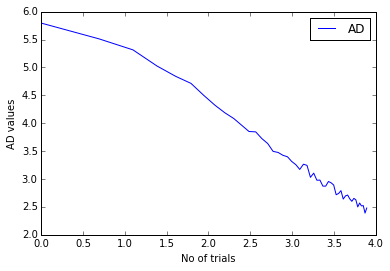

In [91]:
#just for experiments
fig.add_subplot(111)
pl.plot(log(narray), log(ad_b),  label='AD')
pl.xlabel('No of trials')
pl.ylabel('AD values')
#pl.plot([narray[0], narray[-1]],[threshold, threshold])
pl.plot()
pl.plot()
pl.legend()

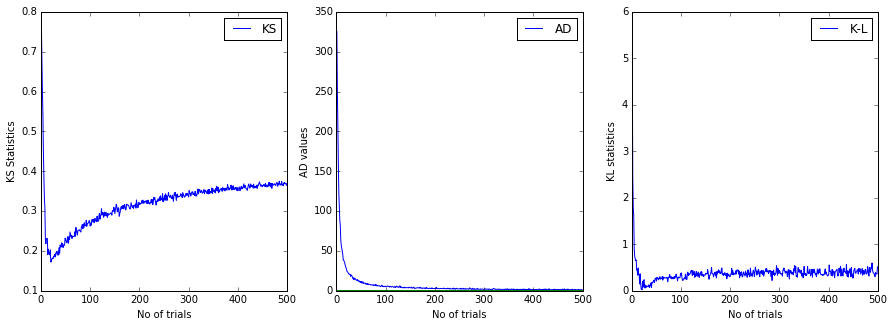

In [81]:
fig = pl.figure(figsize = (15,5))
fig.add_subplot(131)
pl.xlabel('No of trials  ')
pl.ylabel('KS Statistics')
pl.plot(narray, ks_b, label='KS')
#pl.plot(mean(narray),var(narray))
pl.legend()

fig.add_subplot(132)
pl.plot(narray, ad_b,  label='AD')
pl.xlabel('No of trials')
pl.ylabel('AD values')
pl.plot([narray[0], narray[-1]],[threshold, threshold])
pl.plot()
pl.plot()
pl.legend()

fig.add_subplot(133)
pl.xlabel('No of trials')
pl.ylabel('KL statistics')
pl.plot(narray, kl_b, label='K-L ')

pl.legend()

####Ploting with bargraph and scatter plot to see the distribution and the values together

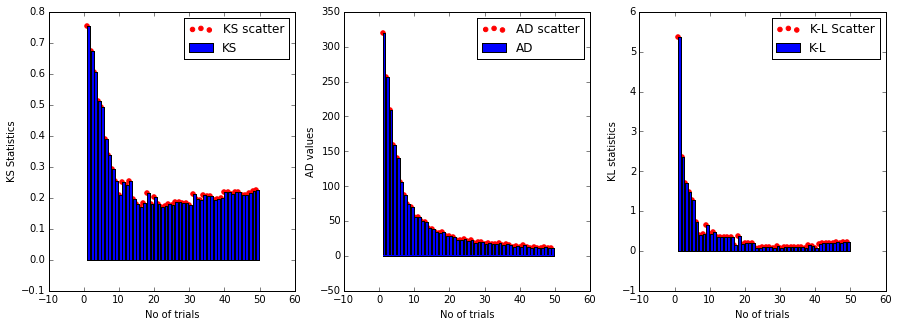

In [67]:
fig = pl.figure(figsize = (15,5))
fig.add_subplot(131)
pl.xlabel('No of trials  ')
pl.ylabel('KS Statistics')
pl.scatter(narray, ks_b, color ='r',label='KS scatter')
pl.bar(narray, ks_b,label='KS')
pl.legend()

fig.add_subplot(132)
pl.scatter(narray, ad_b, color='r', label='AD scatter')
pl.bar(narray, ad_b,  label='AD')
pl.xlabel('No of trials')
pl.ylabel('AD values')
pl.plot([narray[0], narray[-1]],[threshold, threshold])
pl.plot()
pl.plot()
pl.legend()

fig.add_subplot(133)
pl.xlabel('No of trials')
pl.ylabel('KL statistics')
pl.scatter(narray, kl_b, label='K-L Scatter ',color='r')
pl.bar(narray, kl_b, label='K-L')


pl.legend()

###Conclusion :
For the KS statistics with the increase in the number of trials (till the trials~10 in  fig1.1) the ks stats value decrease , and the critical value is changing because of the (1.36/sqrt(n)) which means the distributions' goodness of fit increases as KS value is greater than critical value.

for example for no of trials the sig value ~0.2 and ks value >0.2

For the AD  and KL the goodness of fit of the distributions f(x) and g(x) increase with the increase in the number of trials.

In general from the above samples the goodness of fit increases with the increase in the number of trials.

In [104]:
#to store the data i am generating an empty array of the size of the values of n i want to test. i do that with np.zeros which takes the length of the array as argument, and the data type as optional argument, but default is float, which is fine by me, so i do not need any argument other then the lenght 
narray = range(1,50,1)
ks_b = np.zeros(len(narray))
ad_b = np.zeros(len(narray))
kl_b = np.zeros(len(narray))
chi2_b = np.zeros(len(narray))


#then i put the tests in a for loop so that i can generate a distribution for given parameters once, 
#and run all tests against it
#now the valus that i want to plot depends on how i intend to describe the plot, and viceversa. 

#here is one way to plot it, knowing the values i get for the tests when 
#i throw in a poisson distribution with low l and compare it with a gaussian and 
#assuming that that is a vary bad match

for i,n in enumerate(narray):
    p=0.1 #parameter for the binomial, my arbitrary choice
    #generate the distribution
    dist = np.random.poisson(n, 1000)
    #run the tests. 
    ks_b[i] = scipy.stats.kstest(dist, mynorm, args=(n, n))[0]
    ad_b[i] = scipy.stats.anderson(dist, dist='norm')[0]
    
        
    # for KL and Pearson's chisq I have to simulate the normal distribution as well
    mybins = np.linspace(min(dist),max(dist), 10) 
    bincenters = mybins[:-1]+0.5*(mybins[1]-mybins[0])
 
    kl_b [i] =  scipy.stats.entropy(np.histogram(dist, bins=mybins)[0], scipy.stats.norm.pdf(bincenters, loc=n*p, scale=n*p*(1.0-p)))

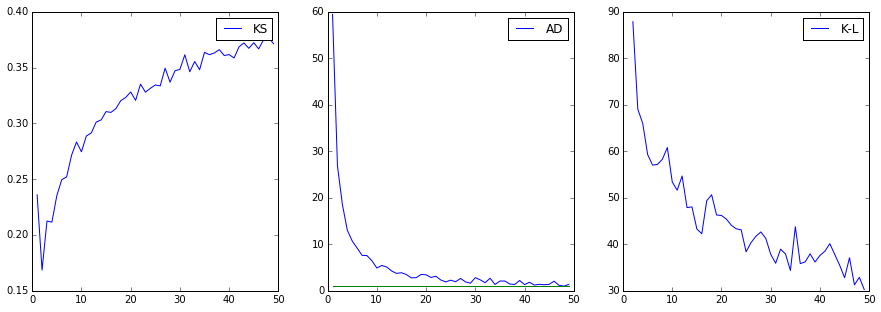

In [105]:
fig = pl.figure(figsize = (15,5))
fig.add_subplot(131)
pl.plot(narray, ks_b, label='KS')
pl.legend()

fig.add_subplot(132)
pl.plot(narray, ad_b,  label='AD')
pl.plot([narray[0], narray[-1]],[threshold, threshold])
pl.plot()
pl.plot()
pl.legend()

fig.add_subplot(133)
pl.plot(narray, kl_b, label='K-L ')

pl.legend()

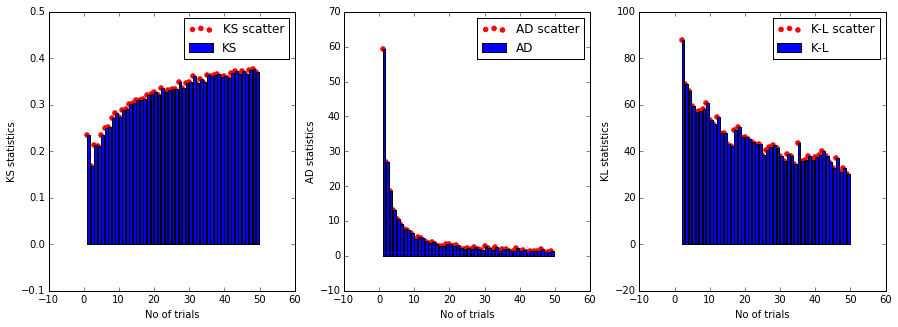

In [108]:
fig = pl.figure(figsize = (15,5))
fig.add_subplot(131)
pl.scatter(narray, ks_b,color='r', label='KS scatter')
pl.bar(narray, ks_b, label='KS')
pl.xlabel('No of trials')
pl.ylabel('KS statistics')
pl.legend()

fig.add_subplot(132)
pl.scatter(narray, ad_b,color='r',label='AD scatter')
pl.bar(narray, ad_b,  label='AD')
pl.xlabel('No of trials')
pl.ylabel('AD statistics')
pl.plot([narray[0], narray[-1]],[threshold, threshold])
pl.plot()
pl.plot()
pl.legend()

fig.add_subplot(133)
pl.scatter(narray, kl_b, color='r',label='K-L scatter')
pl.bar(narray, kl_b, label='K-L ')
pl.xlabel('No of trials')
pl.ylabel('KL statistics')

pl.legend()

###Conclusion
For the KS statistics : The goodness of fit for the poisson and the normal decreases with the increase in the number of trials.
For AD and KL the goodness of fit for the poisson and the normal increaes wiht the increase in the number of trials as the AD and KL stats value is decreasing.

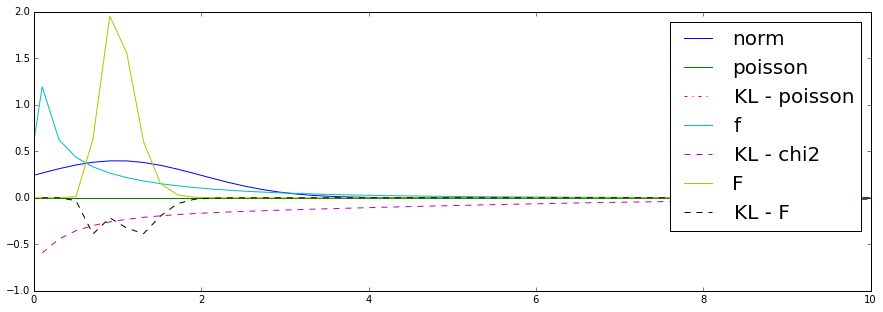

In [111]:
pl.figure(figsize=(15,5))

p = lambda x, mu : scipy.stats.distributions.poisson.pmf(x,mu)
q = lambda x, mu : scipy.stats.distributions.norm.pdf(x-mu)
c = lambda x, mu : scipy.stats.distributions.chi2.pdf(x, df=mu)
f = lambda x, mu : scipy.stats.distributions.f.pdf(x,100,100)

Dkl = lambda x ,mu, p :  p(x, mu)* np.log10(q(x, mu)) + p(x, mu) *np.log10(p(x, mu))

def model(x) : 
    return 1./(s*np.sqrt(2*np.pi))*exp(-((x-m)/2./2./s)**2)

x=np.linspace(-10,10,100)
pl.plot(x, q(x,1), label='norm')
pl.plot(x, p(x,1), label='poisson')
pl.plot(x, Dkl(x, 1, p), '-.', label = 'KL - poisson')

#print np.nansum(Dkl(np.linspace(0,30,1000), 1, p))


pl.plot(x, c(x,1), label='f')
pl.plot(x,Dkl(x, 1, c), '--', label = 'KL - chi2')



#print np.nansum(Dkl(np.linspace(0,30,1000), 1, c))


pl.plot(x, f(x,1), label='F')
pl.plot(x,Dkl(x, 1, f), '--', label = 'KL - F')

#print np.nansum(Dkl(np.linspace(0,30,1000), 1, f))
bins = np.arange(0, 99, 10)

pl.xlim(0,10)
pl.legend( fontsize = 20)